# Ensemble Learning

## Weighted Mean Ensemble

In [1]:
from models.ensemble_weighted_mean import EnsembleWeightedMean

ensemble_direct_optimization = EnsembleWeightedMean(optimization=True)
ensemble_direct_optimization_with_features = EnsembleWeightedMean(optimization=True, with_features=True)
ensemble_weigthed_mean = EnsembleWeightedMean(optimization=False)

data = 'ensemble-pd-hek293t-pe2.csv'

ensemble_direct_optimization.fit(data)
direct_optimization_performance = ensemble_direct_optimization.test(data) 

ensemble_weigthed_mean.fit(data)
weighted_mean_performance = ensemble_weigthed_mean.test(data)

ensemble_direct_optimization_with_features.fit(data)
ensemble_direct_optimization_with_features.test(data)
with_features_performance = ensemble_direct_optimization_with_features.test(data)

Training MLP
  epoch    train_loss    valid_loss    cp      lr     dur
-------  ------------  ------------  ----  ------  ------
      1      688.9134      916.8638     +  0.0050  0.7427
      2      500.5036      900.5613     +  0.0049  0.4836
      3      438.3748      841.0196     +  0.0045  0.4729
      4      397.5946      931.2947        0.0040  0.4782
      5      382.8753     1031.1032        0.0033  0.5873
      6      384.3715      995.7896        0.0025  0.4849
      7      401.5575      776.3016     +  0.0017  0.4382
      8      384.6524      818.7215        0.0010  0.4456
      9      385.8793      745.7864     +  0.0005  4.0259
     10      403.5943      690.9545     +  0.0001  0.4360
     11      395.0093      887.6795        0.0050  0.4619
     12      357.7115      889.9169        0.0049  0.4854
     13      358.6397      984.6291        0.0045  0.5435
     14      356.8565     1149.4165        0.0040  0.4945
     15      361.2561     1198.5888        0.0033  0.4548
 

Pearson


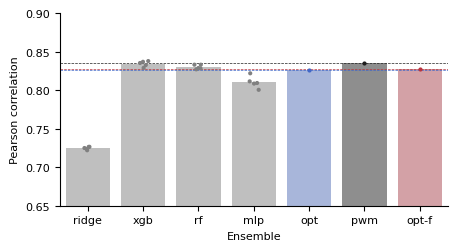

opt vs ridge t-statistic: 48.95222985647993, p-value: 1.0419672579422025e-06
Significant
opt vs xgb t-statistic: -1.9078879006090914, p-value: 0.12905968843273186
Not significant
opt vs rf t-statistic: -1.0437386492406113, p-value: 0.3555310309279275
Not significant
opt vs mlp t-statistic: 1.9552760930713855, p-value: 0.12221500392400016
Not significant
pwm vs ridge t-statistic: 53.023372448746876, p-value: 7.572734868710487e-07
Significant
pwm vs xgb t-statistic: 0.2559295614035877, p-value: 0.8106278470457987
Not significant
pwm vs rf t-statistic: 1.6898683541248476, p-value: 0.16631856958788852
Not significant
pwm vs mlp t-statistic: 2.9635909241798783, p-value: 0.04140660917156782
Significant
opt-f vs ridge t-statistic: 49.13209236864198, p-value: 1.026813966517574e-06
Significant
opt-f vs xgb t-statistic: -1.8122907467985228, p-value: 0.14416285197400647
Not significant
opt-f vs rf t-statistic: -0.9229682729283213, p-value: 0.40825837186448943
Not significant
opt-f vs mlp t-statis

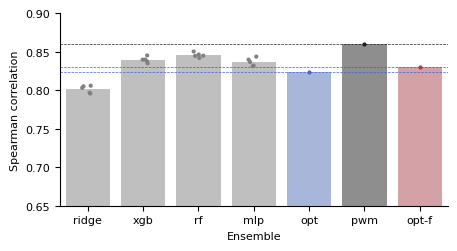

opt vs ridge t-statistic: 4.204378411068844, p-value: 0.013647675133882965
Significant
opt vs xgb t-statistic: -3.9485655021542194, p-value: 0.016838258441543682
Significant
opt vs rf t-statistic: -6.615086886192602, p-value: 0.002707576199476944
Significant
opt vs mlp t-statistic: -2.342426937930312, p-value: 0.07916792992583335
Not significant
pwm vs ridge t-statistic: 11.365442103854198, p-value: 0.00034175734346786205
Significant
pwm vs xgb t-statistic: 5.099050397842204, p-value: 0.0069872243028478494
Significant
pwm vs rf t-statistic: 4.369243484928141, p-value: 0.011975162746059018
Significant
pwm vs mlp t-statistic: 4.135581138712532, p-value: 0.014428248660445665
Significant
opt-f vs ridge t-statistic: 5.625227155347504, p-value: 0.004911517511784772
Significant
opt-f vs xgb t-statistic: -2.1534001130826153, p-value: 0.09760860956484319
Not significant
opt-f vs rf t-statistic: -4.435652002758635, p-value: 0.01137213968658257
Significant
opt-f vs mlp t-statistic: -1.05710536616

In [7]:
import numpy as np
import pandas as pd
from os.path import join as pjoin

direct_op_pearson, direct_op_spearman, direct_op_pearson_train, direct_op_spearman_train = direct_optimization_performance
performance_weighted_pearson, performance_weighted_spearman, performance_weighted_pearson_train, performance_weighted_spearman_train = weighted_mean_performance
performance_with_features_pearson, performance_with_features_spearman, performance_with_features_pearson_train, performance_with_features_spearman_train = with_features_performance

# join the performance values, ignore the common keys
direct_op_pearson.update(performance_weighted_pearson)
direct_op_spearman.update(performance_weighted_spearman)
direct_op_pearson_train.update(performance_weighted_pearson_train)
direct_op_spearman_train.update(performance_weighted_spearman_train)

direct_op_pearson.update(performance_with_features_pearson)
direct_op_spearman.update(performance_with_features_spearman)
direct_op_pearson_train.update(performance_with_features_pearson_train)
direct_op_spearman_train.update(performance_with_features_spearman_train)

performance_pearson = direct_op_pearson
performance_spearman = direct_op_spearman
performance_pearson_train = direct_op_pearson_train
performance_spearman_train = direct_op_spearman_train

# plot the performance as bar plot
import matplotlib.pyplot as plt
import seaborn as sns

alpha = 0.5
f_size = 8
# plot the bar plot on top of the strip plot
# bar plot should be shortened to emphasize the difference in values
for name, performance in zip(['Pearson', 'Spearman'], [performance_pearson, performance_spearman]):
    # performance = pd.DataFrame({'Models': list(performance.keys()), 'Performance': list(performance.values()), 'Category': [0 if 'op' in model or 'pwm' in model else 1 for model in performance.keys()]})
    # print(performance)
    # add a category column
    print(name)
    fig, ax = plt.subplots(figsize=(5, 2.5))
    ax.set_ylim(0.65, 0.9)
    colour_palette = iter(sns.color_palette('icefire', n_colors=3))
    colours = ['gray' if not ('opt' in model or 'pwm' in model) else next(colour_palette) for model in performance.keys()]
    sns.stripplot(data=performance, ax=ax, alpha=1, jitter=0.1, size=3, palette=colours)
    sns.barplot(data=performance, ax=ax, alpha=alpha, palette=colours, errorbar=None)
    ax.set_xlabel('Ensemble', fontsize=f_size)
    ax.set_ylabel(f'{name} correlation', fontsize=f_size)
    ax.tick_params(axis='both', which='major', labelsize=f_size)
    ax.tick_params(axis='both', which='minor', labelsize=f_size)
    # remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # show a horizontal line at the mean for 'opt', 'pwm' models of matching color
    for ind, model in enumerate(performance.keys()):
        if 'opt' in model or 'pwm' in model:
            ax.axhline(y=performance[model], color=colours[ind], linestyle='--', linewidth=0.5)
    # rotate the x tick labels
    plt.show()
    
    # perform paired t-test between opt pwm models and the rest
    from scipy.stats import ttest_ind
    opt_pwm_values = {model: performance[model] for model in performance.keys() if 'opt' in model or 'pwm' in model}
    rest_values = {model: performance[model] for model in performance.keys() if not ('opt' in model or 'pwm' in model)}

    for opt_pwm, performance_opt_pwm in zip(opt_pwm_values.keys(), opt_pwm_values.values()):
        for rest, performance_rest in zip(rest_values.keys(), rest_values.values()):
            t_stat, p_value = ttest_ind(performance_opt_pwm, performance_rest)
            print(f'{opt_pwm} vs {rest} t-statistic: {t_stat}, p-value: {p_value}')
            if p_value < 0.05:
                print('Significant')
            else:
                print('Not significant')
                
    # save the figure
    fig.savefig(pjoin('dissertation', 'figures', f'ensemble_{name.lower()}.pdf'), bbox_inches='tight')